## Observations and Insights 

In [283]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resource/Mouse_metadata.csv"
study_results_path = "Resource/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Trial_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
Trial_data_complete_df = Trial_data_complete
Trial_data_complete_df.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [284]:
# Checking the number of mice.
No_of_mouse = len(Trial_data_complete_df["Mouse ID"].unique())
No_of_mouse



249

In [285]:
#Rename the column Name for Mouse ID to MouseID
Trial_data_complete_renamed_df = Trial_data_complete_df.rename(columns={"Mouse ID":"MouseID"})
Trial_data_complete_renamed_df

,MouseID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [286]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Inserting a new column by concat Mouse ID and timepoint to identify any duplicated data (search from Youtube)
Trial_data_complete_renamed_df["MouseID_Timepoint"] = Trial_data_complete_renamed_df["MouseID"] + '-' + Trial_data_complete_renamed_df["Timepoint"].astype(str)
Trial_data_complete_renamed_df

,MouseID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,MouseID_Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,k403-0
1,k403,Ramicane,Male,21,16,5,38.825898,0,k403-5
2,k403,Ramicane,Male,21,16,10,35.014271,1,k403-10
3,k403,Ramicane,Male,21,16,15,34.223992,1,k403-15
4,k403,Ramicane,Male,21,16,20,32.997729,1,k403-20
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,z969-25
1889,z969,Naftisol,Male,9,30,30,65.841013,3,z969-30
1890,z969,Naftisol,Male,9,30,35,69.176246,4,z969-35
1891,z969,Naftisol,Male,9,30,40,70.314904,4,z969-40


In [287]:
#Save the rename df to a variable
Trial_data_complete_rename =Trial_data_complete_renamed_df

In [288]:
#Find out how many duplicated data for the same MouseID and same Timepoint (search from youtube)
Trial_data_complete_renamed_df["MouseID_Timepoint"].duplicated().sum()

5

In [289]:
#Call out and print those 5 duplicated data by the column "MouseID_Timepoint"
#Result show they are related to one particular MouseID
Trial_data_complete_rename.loc[Trial_data_complete_renamed_df["MouseID_Timepoint"].duplicated(), :]

,MouseID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,MouseID_Timepoint
909,g989,Propriva,Female,21,26,0,45.000000,0,g989-0
911,g989,Propriva,Female,21,26,5,47.570392,0,g989-5
913,g989,Propriva,Female,21,26,10,49.880528,0,g989-10
915,g989,Propriva,Female,21,26,15,53.442020,0,g989-15
917,g989,Propriva,Female,21,26,20,54.657650,1,g989-20


In [290]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Trial_data_complete_cleaned_df = Trial_data_complete_rename[Trial_data_complete_rename["MouseID"] != "g989"]
Trial_data_complete_cleaned_df

,MouseID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,MouseID_Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,k403-0
1,k403,Ramicane,Male,21,16,5,38.825898,0,k403-5
2,k403,Ramicane,Male,21,16,10,35.014271,1,k403-10
3,k403,Ramicane,Male,21,16,15,34.223992,1,k403-15
4,k403,Ramicane,Male,21,16,20,32.997729,1,k403-20
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,z969-25
1889,z969,Naftisol,Male,9,30,30,65.841013,3,z969-30
1890,z969,Naftisol,Male,9,30,35,69.176246,4,z969-35
1891,z969,Naftisol,Male,9,30,40,70.314904,4,z969-40


In [291]:
#After removing the mouse that had duplicated timepoint, check how many mouse in the dataset
No_of_mouse_checker = len(Trial_data_complete_cleaned_df["MouseID"].unique())
No_of_mouse_checker

248

## Summary Statistics

In [292]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


In [293]:
#Looking at the column name
Trial_data_complete_cleaned_df.columns

Index(['MouseID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'MouseID_Timepoint'],
      dtype='object')

In [294]:
#To start my summary statistics. Have a look at how many regimens we have in the dataset
No_of_regimen = (Trial_data_complete_cleaned_df["Drug Regimen"].value_counts())
No_of_regimen

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

In [295]:
Mean_Tumor_Volume = Trial_data_complete_cleaned_df.groupby("Drug Regimen").mean()['Tumor Volume (mm3)']
Mean_Tumor_Volume

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [296]:
Mean_Age_Months = Trial_data_complete_cleaned_df.groupby("Drug Regimen").mean()['Age_months']
Mean_Age_Months 


Drug Regimen
Capomulin    13.456522
Ceftamin     13.247191
Infubinol    16.230337
Ketapril     15.659574
Naftisol     12.000000
Placebo      10.734807
Propriva     10.006757
Ramicane     10.684211
Stelasyn     12.784530
Zoniferol    12.598901
Name: Age_months, dtype: float64

In [297]:
Mean_Weight = Trial_data_complete_cleaned_df.groupby("Drug Regimen").mean()['Weight (g)']
Mean_Weight

Drug Regimen
Capomulin    19.965217
Ceftamin     27.398876
Infubinol    27.196629
Ketapril     27.861702
Naftisol     27.166667
Placebo      27.928177
Propriva     27.135135
Ramicane     19.679825
Stelasyn     27.856354
Zoniferol    27.692308
Name: Weight (g), dtype: float64

In [298]:
Mean_Metastatic_Sites = Trial_data_complete_cleaned_df.groupby("Drug Regimen").mean()['Metastatic Sites']
Mean_Metastatic_Sites

Drug Regimen
Capomulin    0.713043
Ceftamin     1.179775
Infubinol    0.960674
Ketapril     1.297872
Naftisol     1.182796
Placebo      1.441989
Propriva     1.013514
Ramicane     0.548246
Stelasyn     0.872928
Zoniferol    1.230769
Name: Metastatic Sites, dtype: float64

In [299]:
Median_Tumor_Volume = Trial_data_complete_cleaned_df.groupby("Drug Regimen").median()['Tumor Volume (mm3)']
Median_Tumor_Volume

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [300]:
Median_Age_Months = Trial_data_complete_cleaned_df.groupby("Drug Regimen").median()['Age_months']
Median_Age_Months

Drug Regimen
Capomulin    16.5
Ceftamin     12.0
Infubinol    20.0
Ketapril     18.0
Naftisol      9.0
Placebo      10.0
Propriva      7.5
Ramicane      9.0
Stelasyn     14.0
Zoniferol    12.5
Name: Age_months, dtype: float64

In [301]:
Median_Weight = Trial_data_complete_cleaned_df.groupby("Drug Regimen").median()['Weight (g)']
Median_Weight


Drug Regimen
Capomulin    20.5
Ceftamin     28.0
Infubinol    27.0
Ketapril     28.0
Naftisol     27.0
Placebo      28.0
Propriva     26.0
Ramicane     19.0
Stelasyn     28.0
Zoniferol    28.0
Name: Weight (g), dtype: float64

In [302]:
Median_Metastatic_Sites = Trial_data_complete_cleaned_df.groupby("Drug Regimen").median()['Metastatic Sites']
Median_Metastatic_Sites

Drug Regimen
Capomulin    0.0
Ceftamin     1.0
Infubinol    1.0
Ketapril     1.0
Naftisol     1.0
Placebo      1.0
Propriva     1.0
Ramicane     0.0
Stelasyn     1.0
Zoniferol    1.0
Name: Metastatic Sites, dtype: float64

In [303]:
Variance_Tumor_Volume = Trial_data_complete_cleaned_df.groupby("Drug Regimen").var()['Tumor Volume (mm3)']
Variance_Tumor_Volume

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [304]:
Variance_Age_Months = Trial_data_complete_cleaned_df.groupby("Drug Regimen").var()['Age_months']
Variance_Age_Months

Drug Regimen
Capomulin    59.620372
Ceftamin     65.147591
Infubinol    56.404272
Ketapril     36.236432
Naftisol     45.102703
Placebo      40.384837
Propriva     48.251655
Ramicane     35.362393
Stelasyn     63.036648
Zoniferol    33.479115
Name: Age_months, dtype: float64

In [305]:
Vairance_Weight = Trial_data_complete_cleaned_df.groupby("Drug Regimen").var()['Weight (g)']
Vairance_Weight

Drug Regimen
Capomulin     7.466034
Ceftamin      2.501016
Infubinol     4.769028
Ketapril      3.392536
Naftisol      2.247748
Placebo       3.378146
Propriva      2.933995
Ramicane     10.465318
Stelasyn      2.701473
Zoniferol     2.015300
Name: Weight (g), dtype: float64

In [306]:
Variance_Metastatic_Sites = Trial_data_complete_cleaned_df.groupby("Drug Regimen").var()['Metastatic Sites']
Variance_Metastatic_Sites

Drug Regimen
Capomulin    0.720790
Ceftamin     1.402527
Infubinol    1.054942
Ketapril     1.942883
Naftisol     1.479919
Placebo      1.792449
Propriva     1.224306
Ramicane     0.477838
Stelasyn     0.944874
Zoniferol    1.559711
Name: Metastatic Sites, dtype: float64

In [307]:
Standard_Deviation_Tumor_Volume = Trial_data_complete_cleaned_df.groupby("Drug Regimen").std()['Tumor Volume (mm3)']
Standard_Deviation_Tumor_Volume

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [308]:
Standard_Deviation_Age_Months = Trial_data_complete_cleaned_df.groupby("Drug Regimen").std()['Age_months']
Standard_Deviation_Age_Months

Drug Regimen
Capomulin    7.721423
Ceftamin     8.071406
Infubinol    7.510278
Ketapril     6.019670
Naftisol     6.715855
Placebo      6.354907
Propriva     6.946341
Ramicane     5.946629
Stelasyn     7.939562
Zoniferol    5.786114
Name: Age_months, dtype: float64

In [309]:
Standard_Deviation_Weight = Trial_data_complete_cleaned_df.groupby("Drug Regimen").std()['Weight (g)']
Standard_Deviation_Weight

Drug Regimen
Capomulin    2.732404
Ceftamin     1.581460
Infubinol    2.183810
Ketapril     1.841884
Naftisol     1.499249
Placebo      1.837973
Propriva     1.712891
Ramicane     3.235014
Stelasyn     1.643616
Zoniferol    1.419612
Name: Weight (g), dtype: float64

In [310]:
Standard_Deviation_Metastatic_Sites = Trial_data_complete_cleaned_df.groupby("Drug Regimen").std()['Metastatic Sites']
Standard_Deviation_Metastatic_Sites

Drug Regimen
Capomulin    0.848993
Ceftamin     1.184283
Infubinol    1.027104
Ketapril     1.393873
Naftisol     1.216519
Placebo      1.338824
Propriva     1.106484
Ramicane     0.691259
Stelasyn     0.972046
Zoniferol    1.248884
Name: Metastatic Sites, dtype: float64

In [311]:
SEM_Tumor_Volume = Trial_data_complete_cleaned_df.groupby("Drug Regimen").sem()['Tumor Volume (mm3)']
SEM_Tumor_Volume

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [312]:
SEM_Age_Months = Trial_data_complete_cleaned_df.groupby("Drug Regimen").sem()['Age_months']
SEM_Age_Months

Drug Regimen
Capomulin    0.509136
Ceftamin     0.604977
Infubinol    0.562919
Ketapril     0.439030
Naftisol     0.492430
Placebo      0.472356
Propriva     0.570986
Ramicane     0.393825
Stelasyn     0.590143
Zoniferol    0.428895
Name: Age_months, dtype: float64

In [313]:
SEM_Weight = Trial_data_complete_cleaned_df.groupby("Drug Regimen").sem()['Weight (g)']
SEM_Weight

Drug Regimen
Capomulin    0.180169
Ceftamin     0.118535
Infubinol    0.163684
Ketapril     0.134333
Naftisol     0.109930
Placebo      0.136615
Propriva     0.140799
Ramicane     0.214244
Stelasyn     0.122169
Zoniferol    0.105229
Name: Weight (g), dtype: float64

In [314]:
SEM_Metastatic_Sites = Trial_data_complete_cleaned_df.groupby("Drug Regimen").sem()['Metastatic Sites']
SEM_Metastatic_Sites

Drug Regimen
Capomulin    0.055981
Ceftamin     0.088766
Infubinol    0.076985
Ketapril     0.101659
Naftisol     0.089200
Placebo      0.099514
Propriva     0.090952
Ramicane     0.045780
Stelasyn     0.072252
Zoniferol    0.092573
Name: Metastatic Sites, dtype: float64

In [315]:
Summary_Statistic_df = pd.DataFrame({"Mean Tumor Volume": Mean_Tumor_Volume,
                                "Mean Weight":Mean_Weight,
                                "Mean Age_Months":Mean_Age_Months,
                                "Mean Metastatic Sites":Mean_Metastatic_Sites,
                                "Median Tumor Volume":Median_Tumor_Volume,
                                "Median Weight":Median_Weight,
                                "Median Age_Months":Median_Age_Months,
                                "Median Metastatic Site":Median_Metastatic_Sites,
                                "Variance Tumor Volume":Variance_Tumor_Volume,
                                "Variance Weight":Vairance_Weight,
                                "Variance Age_Months":Variance_Age_Months,
                                "Variance Metastatic Sites":Variance_Metastatic_Sites,
                                "Std Deviation Tumor Volume":Standard_Deviation_Tumor_Volume,
                                "Std Deviation Weight":Standard_Deviation_Weight,
                                "Std Deviation Age_Months":Standard_Deviation_Age_Months,
                                "Std Deviation Metastatic Site":Standard_Deviation_Metastatic_Sites,
                                "SEM Tumor Volume":SEM_Tumor_Volume,
                                "SEM Weight":SEM_Weight,
                                "SEM Age_Months":SEM_Age_Months,
                                "SEM Metastatic Sites":SEM_Metastatic_Sites})
Summary_Statistic_df


,Mean Tumor Volume,Mean Weight,Mean Age_Months,Mean Metastatic Sites,Median Tumor Volume,Median Weight,Median Age_Months,Median Metastatic Site,Variance Tumor Volume,Variance Weight,Variance Age_Months,Variance Metastatic Sites,Std Deviation Tumor Volume,Std Deviation Weight,Std Deviation Age_Months,Std Deviation Metastatic Site,SEM Tumor Volume,SEM Weight,SEM Age_Months,SEM Metastatic Sites
Drug Regimen,,,,,,,,,,,,,,,,,,,,
Capomulin,40.675741,19.965217,13.456522,0.713043,41.557809,20.5,16.5,0.0,24.947764,7.466034,59.620372,0.720790,4.994774,2.732404,7.721423,0.848993,0.329346,0.180169,0.509136,0.055981
Ceftamin,52.591172,27.398876,13.247191,1.179775,51.776157,28.0,12.0,1.0,39.290177,2.501016,65.147591,1.402527,6.268188,1.581460,8.071406,1.184283,0.469821,0.118535,0.604977,0.088766
Infubinol,52.884795,27.196629,16.230337,0.960674,51.820584,27.0,20.0,1.0,43.128684,4.769028,56.404272,1.054942,6.567243,2.183810,7.510278,1.027104,0.492236,0.163684,0.562919,0.076985
Ketapril,55.235638,27.861702,15.659574,1.297872,53.698743,28.0,18.0,1.0,68.553577,3.392536,36.236432,1.942883,8.279709,1.841884,6.019670,1.393873,0.603860,0.134333,0.439030,0.101659
Naftisol,54.331565,27.166667,12.000000,1.182796,52.509285,27.0,9.0,1.0,66.173479,2.247748,45.102703,1.479919,8.134708,1.499249,6.715855,1.216519,0.596466,0.109930,0.492430,0.089200
Placebo,54.033581,27.928177,10.734807,1.441989,52.288934,28.0,10.0,1.0,61.168083,3.378146,40.384837,1.792449,7.821003,1.837973,6.354907,1.338824,0.581331,0.136615,0.472356,0.099514
Propriva,52.320930,27.135135,10.006757,1.013514,50.446266,26.0,7.5,1.0,43.852013,2.933995,48.251655,1.224306,6.622085,1.712891,6.946341,1.106484,0.544332,0.140799,0.570986,0.090952
Ramicane,40.216745,19.679825,10.684211,0.548246,40.673236,19.0,9.0,0.0,23.486704,10.465318,35.362393,0.477838,4.846308,3.235014,5.946629,0.691259,0.320955,0.214244,0.393825,0.045780
Stelasyn,54.233149,27.856354,12.784530,0.872928,52.431737,28.0,14.0,1.0,59.450562,2.701473,63.036648,0.944874,7.710419,1.643616,7.939562,0.972046,0.573111,0.122169,0.590143,0.072252


## Bar and Pie Charts

In [316]:
#recall the columns 
Trial_data_complete_cleaned_df.columns

Index(['MouseID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'MouseID_Timepoint'],
      dtype='object')

In [317]:
Trial_data_complete_cleaned_df

,MouseID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,MouseID_Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,k403-0
1,k403,Ramicane,Male,21,16,5,38.825898,0,k403-5
2,k403,Ramicane,Male,21,16,10,35.014271,1,k403-10
3,k403,Ramicane,Male,21,16,15,34.223992,1,k403-15
4,k403,Ramicane,Male,21,16,20,32.997729,1,k403-20
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,z969-25
1889,z969,Naftisol,Male,9,30,30,65.841013,3,z969-30
1890,z969,Naftisol,Male,9,30,35,69.176246,4,z969-35
1891,z969,Naftisol,Male,9,30,40,70.314904,4,z969-40


In [318]:
#Find out the number of mouse for each Drug, only keep the first row as only one mouse ID count each time
Selected_columns_Trail_data_complete_df = Trial_data_complete_cleaned_df[["MouseID","Drug Regimen"]].copy()
Selected_columns_Trail_data_complete_df.drop_duplicates(keep='first', inplace = True)
Selected_columns_Trail_data_complete_df


,MouseID,Drug Regimen
0,k403,Ramicane
10,s185,Capomulin
20,x401,Capomulin
30,m601,Capomulin
40,g791,Ramicane
...,...,...
1858,z314,Stelasyn
1860,z435,Propriva
1863,z581,Infubinol
1873,z795,Naftisol


In [319]:
Mouse_for_Drug_Regimen = Selected_columns_Trail_data_complete_df["Drug Regimen"].value_counts()
Mouse_for_Drug_Regimen

Ramicane     25
Capomulin    25
Infubinol    25
Placebo      25
Ceftamin     25
Zoniferol    25
Ketapril     25
Naftisol     25
Stelasyn     24
Propriva     24
Name: Drug Regimen, dtype: int64

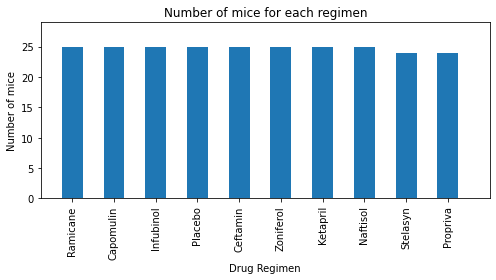

In [320]:
# # Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

Mouse_for_Drug_Regimen.plot(kind="bar", figsize = (7,4))
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice")
plt.title("Number of mice for each regimen")
#plt.xticklabels(Selected_columns_Trail_data_complete_df["Drug Regimen"], rotation=45, horizontalalignment="right")
plt.xlim(-0.75,10)
plt.ylim(0,max(Mouse_for_Drug_Regimen)+4)
plt.tight_layout()


In [321]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# Set x axis and tick locations
x_axis = np.arange(len(Selected_columns_Trail_data_complete_df["Drug Regimen"]))
tick_locations = [value for value in x_axis]

In [322]:
Selected_Gender_columns_Trail_data_complete_df = Trial_data_complete_cleaned_df[["MouseID","Sex"]].copy()
Selected_Gender_columns_Trail_data_complete_df.drop_duplicates(keep='first', inplace = True)
Mouse_Gender_for_Drug_Regimen = Selected_Gender_columns_Trail_data_complete_df["Sex"].value_counts()
Mouse_Gender_for_Drug_Regimen

Male      125
Female    123
Name: Sex, dtype: int64

<AxesSubplot:ylabel='Sex'>

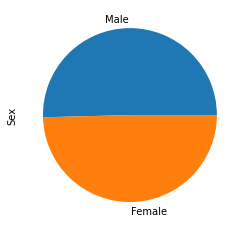

In [323]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

Mouse_Gender_for_Drug_Regimen.plot(kind="pie")

([<matplotlib.patches.Wedge at 0x2737d606760>,
 [Text(-0.013934097579311132, 1.0999117423341975, ''),
  Text(0.013934097579310996, -1.0999117423341975, '')])

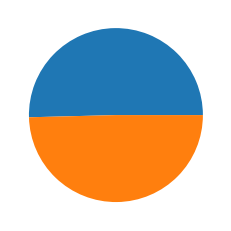

In [324]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(Mouse_Gender_for_Drug_Regimen)

## Quartiles, Outliers and Boxplots

In [325]:
#recall the dataset
Trial_data_complete_cleaned_df

,MouseID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,MouseID_Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,k403-0
1,k403,Ramicane,Male,21,16,5,38.825898,0,k403-5
2,k403,Ramicane,Male,21,16,10,35.014271,1,k403-10
3,k403,Ramicane,Male,21,16,15,34.223992,1,k403-15
4,k403,Ramicane,Male,21,16,20,32.997729,1,k403-20
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,z969-25
1889,z969,Naftisol,Male,9,30,30,65.841013,3,z969-30
1890,z969,Naftisol,Male,9,30,35,69.176246,4,z969-35
1891,z969,Naftisol,Male,9,30,40,70.314904,4,z969-40


In [326]:
#Filter out the four most promising drugs
List_Four_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
Four_Drugs_df = Trial_data_complete_cleaned_df[Trial_data_complete_cleaned_df["Drug Regimen"].isin(List_Four_drugs)].copy()
Four_Drugs_df["Drug Regimen"].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Ceftamin'], dtype=object)

In [327]:
Tumor_Volume_df = Four_Drugs_df.groupby(['Drug Regimen','MouseID'])[['Timepoint','Tumor Volume (mm3)']].last()
Tumor_Volume_df = Tumor_Volume_df.reset_index()
Tumor_Volume_df

,Drug Regimen,MouseID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220
...,...,...,...,...
95,Ramicane,s508,45,30.276232
96,Ramicane,u196,45,40.667713
97,Ramicane,w678,5,43.166373
98,Ramicane,y449,15,44.183451


In [328]:
Tumor_Volume_df[["Drug Regimen","Tumor Volume (mm3)"]]

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,38.982878
1,Capomulin,38.939633
2,Capomulin,30.485985
3,Capomulin,37.074024
4,Capomulin,40.159220
...,...,...
95,Ramicane,30.276232
96,Ramicane,40.667713
97,Ramicane,43.166373
98,Ramicane,44.183451


In [329]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [330]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [331]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [332]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [333]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [334]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
